In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


%matplotlib inline

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [5]:
df['Engaged'].mean()

0.14320122618786948

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [7]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

In [8]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

In [9]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')

In [10]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [11]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [12]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [15]:
sample_df.shape

(9134, 51)

In [16]:
x_train.shape

(6393, 50)

In [17]:
x_test.shape

(2741, 50)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [20]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [21]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=199330940),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=462514017),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1479129772),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=589870437),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=151090504),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1947362908),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=644933051),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=218580365),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=933952501),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1468466725),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=

In [23]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=199330940)

In [24]:
rf_model.estimators_[0].predict(x_test)[:10]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
rf_model.estimators_[1].predict(x_test)[:10]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [26]:
rf_model.estimators_[2].predict(x_test)[:10]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
rf_model.estimators_[3].predict(x_test)[:10]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
rf_model.estimators_[4].predict(x_test)[:10]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.feature_importances_

array([0.05888698, 0.08539148, 0.04661758, 0.02643552, 0.04710866,
       0.01149652, 0.01978267, 0.0768913 , 0.03993654, 0.00702797,
       0.00504364, 0.00663287, 0.0088979 , 0.0075484 , 0.01159351,
       0.00542812, 0.00057956, 0.00164386, 0.00463132, 0.00439733,
       0.00353126, 0.00035858, 0.00171093, 0.00128346, 0.00290424,
       0.00096799, 0.00162102, 0.00123917, 0.00062936, 0.00278239,
       0.00196328, 0.00135015, 0.00209404, 0.00673164, 0.03482274,
       0.00535645, 0.31924698, 0.02565937, 0.03936731, 0.01327677,
       0.01293408, 0.0043321 , 0.00626264, 0.00438234, 0.00411116,
       0.00878958, 0.00325307, 0.00417525, 0.00182031, 0.00707062])

In [30]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.319247,EmploymentStatus.Retired
1,0.085391,Income
7,0.076891,Total.Claim.Amount
0,0.058887,Customer.Lifetime.Value
4,0.047109,Months.Since.Policy.Inception
2,0.046618,Monthly.Premium.Auto
8,0.039937,Sales.Channel.Agent
38,0.039367,Marital.Status.Divorced
34,0.034823,EmploymentStatus.Employed
3,0.026436,Months.Since.Last.Claim


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [32]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [33]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8810
Out-of-Sample Accuracy: 0.8632


In [34]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9708
Out-of-Sample Precision: 0.9388


In [35]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1494
Out-of-Sample Recall: 0.1100


In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [38]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [39]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8832
Out-Sample AUC: 0.8423


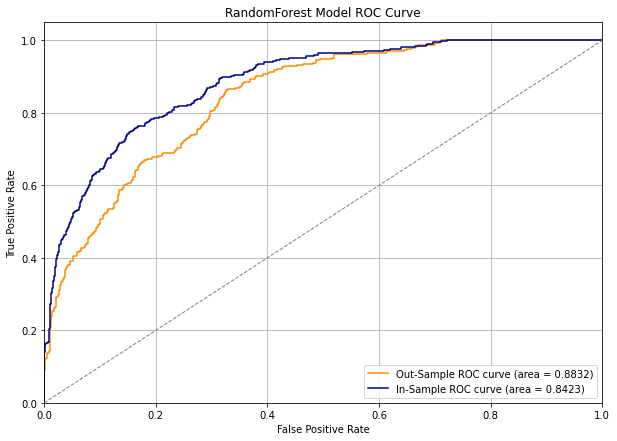

In [40]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()